In [ ]:
# #mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
import time
class Timer(object):
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        self.start_time = time.time()

    def stop(self):
        self.times.append(time.time() - self.start_time)
        return self.times[-1]


In [ ]:
timer = Timer()
df = pd.read_csv('/content/gdrive/MyDrive/final/booking_train_set.csv')

In [ ]:
df.head(10)

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
5,5,1010293,2016-07-10,2016-07-11,55,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
6,6,1010293,2016-07-12,2016-07-13,23921,mobile,359,The Devilfire Empire,Cobra Island,1010293_1
7,7,1010293,2016-07-13,2016-07-15,65322,desktop,9924,The Devilfire Empire,Cobra Island,1010293_1
8,8,1010293,2016-07-15,2016-07-16,23921,desktop,9924,The Devilfire Empire,Cobra Island,1010293_1
9,9,1010293,2016-07-16,2016-07-17,20545,desktop,10573,The Devilfire Empire,Cobra Island,1010293_1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166835 entries, 0 to 1166834
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Unnamed: 0      1166835 non-null  int64 
 1   user_id         1166835 non-null  int64 
 2   checkin         1166835 non-null  object
 3   checkout        1166835 non-null  object
 4   city_id         1166835 non-null  int64 
 5   device_class    1166835 non-null  object
 6   affiliate_id    1166835 non-null  int64 
 7   booker_country  1166835 non-null  object
 8   hotel_country   1166835 non-null  object
 9   utrip_id        1166835 non-null  object
dtypes: int64(4), object(6)
memory usage: 89.0+ MB


In [ ]:
df.loc[df['user_id'].idxmax()]

Unnamed: 0                     420479
user_id                       6258087
checkin           2016-08-03 00:00:00
checkout          2016-08-04 00:00:00
city_id                         17754
device_class                  desktop
affiliate_id                     2436
booker_country                 Gondal
hotel_country                  Gondal
utrip_id                    6258087_1
travel_time           1 days 00:00:00
Name: 420479, dtype: object

In [ ]:
#Thời gian du lịch
df['checkin'] = pd.to_datetime(df['checkin'], yearfirst=True)
df['checkout'] = pd.to_datetime(df['checkout'], yearfirst=True)
df['travel_time'] = pd.DatetimeIndex(df['checkout']) - pd.DatetimeIndex(df['checkin'])

In [ ]:
df.head(10)

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,travel_time
0,0,1006220,2016-04-09,2016-04-11,31114,desktop,384,Gondal,Gondal,1006220_1,2 days
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1 days
2,2,1006220,2016-04-12,2016-04-16,20232,desktop,384,Gondal,Glubbdubdrib,1006220_1,4 days
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1 days
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1 days
5,5,1010293,2016-07-10,2016-07-11,55,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1 days
6,6,1010293,2016-07-12,2016-07-13,23921,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1 days
7,7,1010293,2016-07-13,2016-07-15,65322,desktop,9924,The Devilfire Empire,Cobra Island,1010293_1,2 days
8,8,1010293,2016-07-15,2016-07-16,23921,desktop,9924,The Devilfire Empire,Cobra Island,1010293_1,1 days
9,9,1010293,2016-07-16,2016-07-17,20545,desktop,10573,The Devilfire Empire,Cobra Island,1010293_1,1 days


In [ ]:
#Thời gian du lịch dài nhất
df.travel_time.max()

Timedelta('30 days 00:00:00')

In [ ]:
#Những ID đặt thời gian du lịch dài nhất
df[df['travel_time'] == df.travel_time.max()]

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,travel_time
19012,19012,2323508,2016-11-06,2016-12-06,7716,desktop,10332,Gondal,Glubbdubdrib,2323508_2,30 days
28420,28420,5648237,2016-10-01,2016-10-31,51765,mobile,5755,Gondal,Nevoruss,5648237_1,30 days
28421,28421,5648237,2016-10-31,2016-11-30,51765,mobile,1025,Gondal,Nevoruss,5648237_1,30 days
55668,55668,3729044,2016-05-16,2016-06-15,51259,tablet,2311,Tcherkistan,Oceania,3729044_1,30 days
310831,310831,2235612,2016-07-19,2016-08-18,2748,mobile,359,Elbonia,Leutonia,2235612_1,30 days
460736,460736,5934374,2016-07-11,2016-08-10,17013,desktop,9924,The Devilfire Empire,Borginia,5934374_1,30 days
509084,509084,1906311,2017-01-01,2017-01-31,26904,desktop,384,Gondal,Glubbdubdrib,1906311_2,30 days
592577,592577,4507708,2016-01-10,2016-02-09,63342,desktop,9598,Gondal,Alvonia,4507708_1,30 days
637510,637510,3274842,2016-05-08,2016-06-07,14657,desktop,8022,Gondal,Gondal,3274842_1,30 days
651316,651316,5414614,2016-12-01,2016-12-31,56689,desktop,5755,Gondal,Kangan,5414614_1,30 days


In [ ]:
#Thời gian du lịch ngắn nhất
df.travel_time.min()

Timedelta('1 days 00:00:00')

In [ ]:
#Những ID đặt thời gian du lịch ngắn nhất
df[df['travel_time'] == df.travel_time.min()]

,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id,travel_time
1,1,1006220,2016-04-11,2016-04-12,39641,desktop,384,Gondal,Gondal,1006220_1,1 days
3,3,1006220,2016-04-16,2016-04-17,24144,desktop,384,Gondal,Gondal,1006220_1,1 days
4,4,1010293,2016-07-09,2016-07-10,5325,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1 days
5,5,1010293,2016-07-10,2016-07-11,55,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1 days
6,6,1010293,2016-07-12,2016-07-13,23921,mobile,359,The Devilfire Empire,Cobra Island,1010293_1,1 days
...,...,...,...,...,...,...,...,...,...,...,...
1166820,1166820,986445,2016-08-02,2016-08-03,200,desktop,3518,Gondal,Nairomi,986445_1,1 days
1166821,1166821,986445,2016-08-03,2016-08-04,15110,desktop,9924,Gondal,Nairomi,986445_1,1 days
1166824,1166824,987787,2016-08-22,2016-08-23,66648,tablet,9924,Gondal,Glubbdubdrib,987787_1,1 days
1166825,1166825,987787,2016-08-23,2016-08-24,30520,desktop,643,Gondal,Glubbdubdrib,987787_1,1 days


In [ ]:
df.describe()

,Unnamed: 0,user_id,city_id,affiliate_id,travel_time
count,1.166835e+06,1.166835e+06,1.166835e+06,1.166835e+06,1166835
mean,5.834170e+05,3.129535e+06,3.347059e+04,5.719503e+03,1 days 17:44:24.404478782
std,3.368364e+05,1.808045e+06,1.958255e+04,3.964435e+03,1 days 04:44:17.727221152
min,0.000000e+00,2.900000e+01,2.000000e+00,5.000000e+00,1 days 00:00:00
25%,2.917085e+05,1.562185e+06,1.701300e+04,9.340000e+02,1 days 00:00:00
50%,5.834170e+05,3.126222e+06,3.228200e+04,6.309000e+03,1 days 00:00:00
75%,8.751255e+05,4.701432e+06,5.112800e+04,9.924000e+03,2 days 00:00:00
max,1.166834e+06,6.258087e+06,6.756500e+04,1.069700e+04,30 days 00:00:00


In [ ]:
#Phân tích thời gian du lịch:
timer.start()
df_travel_time = df.groupby('travel_time').count()
df_travel_time.sort_values(by= 'travel_time', inplace= True)
print('Time to exec mean_func %.5f sec:' % timer.stop())
df_travel_time

Time to exec mean_func 0.30239 sec:


,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,hotel_country,utrip_id
travel_time,,,,,,,,,,
1 days,674542,674542,674542,674542,674542,674542,674542,674542,674542,674542
2 days,283720,283720,283720,283720,283720,283720,283720,283720,283720,283720
3 days,124508,124508,124508,124508,124508,124508,124508,124508,124508,124508
4 days,47791,47791,47791,47791,47791,47791,47791,47791,47791,47791
5 days,18296,18296,18296,18296,18296,18296,18296,18296,18296,18296
6 days,7791,7791,7791,7791,7791,7791,7791,7791,7791,7791
7 days,6157,6157,6157,6157,6157,6157,6157,6157,6157,6157
8 days,1498,1498,1498,1498,1498,1498,1498,1498,1498,1498
9 days,761,761,761,761,761,761,761,761,761,761


In [ ]:
#5 thời gian mà du khách bỏ ra nhiều nhất
df["travel_time"].value_counts()[0:5]


1 days    674542
2 days    283720
3 days    124508
4 days     47791
5 days     18296
Name: travel_time, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

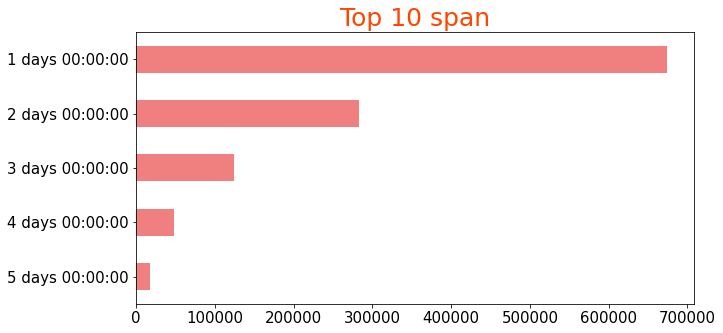

In [ ]:
fig,axes = plt.subplots(figsize = [10,5])
df['travel_time'].value_counts().head(5).sort_values(ascending = True).plot(kind = 'barh', ax = axes, color = 'LightCoral')
plt.title('Top 10 span', fontsize= 25, color = 'OrangeRed')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
#phân tích các thiết bị dùng để booking
df['device_class'].value_counts()

desktop    753860
mobile     331856
tablet      81119
Name: device_class, dtype: int64

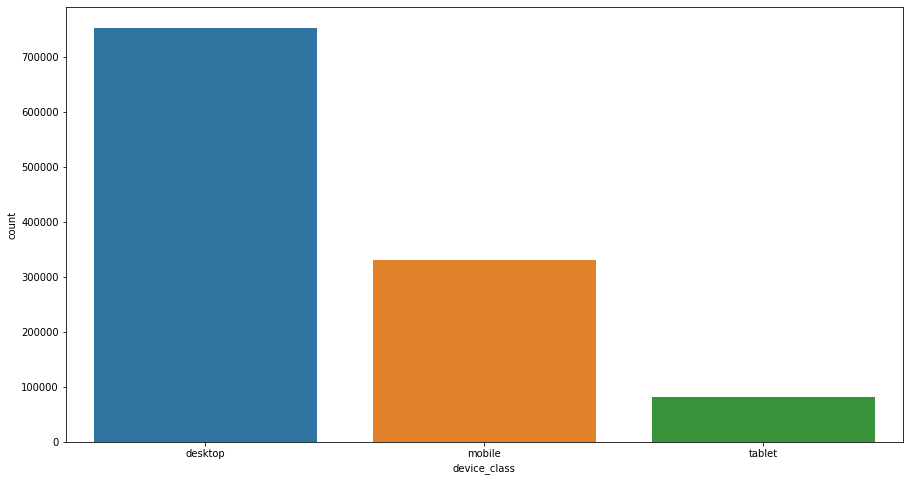

In [ ]:
sns.countplot(df["device_class"])

In [ ]:
 #Thống kê các khách sạn bằng worlcloud
from wordcloud import WordCloud

In [ ]:
hotel_country_df = df[df.hotel_country.notnull()]

In [ ]:
hotel_country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1166835 entries, 0 to 1166834
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype          
---  ------          --------------    -----          
 0   Unnamed: 0      1166835 non-null  int64          
 1   user_id         1166835 non-null  int64          
 2   checkin         1166835 non-null  datetime64[ns] 
 3   checkout        1166835 non-null  datetime64[ns] 
 4   city_id         1166835 non-null  int64          
 5   device_class    1166835 non-null  object         
 6   affiliate_id    1166835 non-null  int64          
 7   booker_country  1166835 non-null  object         
 8   hotel_country   1166835 non-null  object         
 9   utrip_id        1166835 non-null  object         
 10  travel_time     1166835 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(4), object(4), timedelta64[ns](1)
memory usage: 106.8+ MB


In [ ]:
hotel_country_txt = ''.join(hotel_country_df['hotel_country'])

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
wordcloud = WordCloud(font_path='/content/gdrive/MyDrive/final/jp.otf', max_words= 200, max_font_size=40, scale=3).generate(hotel_country_txt)


Time to exec mean_func 0.50205 sec:


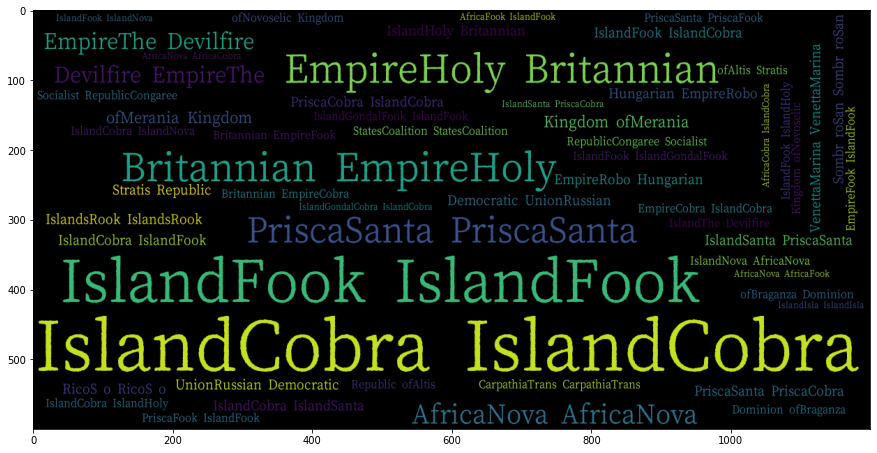

In [ ]:
timer.start()
plt.imshow(wordcloud)
plt.axis
print('Time to exec mean_func %.5f sec:' % timer.stop())
plt.show()

In [ ]:
timer.start()
df_hotel_country = df.groupby('hotel_country').count()
df_hotel_country.sort_values(by= 'booker_country', inplace= True)
print('Time to exec mean_func %.5f sec:' % timer.stop())
df_hotel_country[-10:]


Time to exec mean_func 0.30405 sec:


,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,booker_country,utrip_id,travel_time
hotel_country,,,,,,,,,,
Holy Britannian Empire,30040,30040,30040,30040,30040,30040,30040,30040,30040,30040
Alvonia,34446,34446,34446,34446,34446,34446,34446,34446,34446,34446
Bozatta,40599,40599,40599,40599,40599,40599,40599,40599,40599,40599
Kangan,44876,44876,44876,44876,44876,44876,44876,44876,44876,44876
Borginia,45629,45629,45629,45629,45629,45629,45629,45629,45629,45629
Elbonia,53965,53965,53965,53965,53965,53965,53965,53965,53965,53965
Glubbdubdrib,74840,74840,74840,74840,74840,74840,74840,74840,74840,74840
Gondal,104979,104979,104979,104979,104979,104979,104979,104979,104979,104979
Fook Island,117717,117717,117717,117717,117717,117717,117717,117717,117717,117717


In [ ]:
df_hotel_country.max()

Unnamed: 0        137791
user_id           137791
checkin           137791
checkout          137791
city_id           137791
device_class      137791
affiliate_id      137791
booker_country    137791
utrip_id          137791
travel_time       137791
dtype: int64

In [ ]:
df_hotel_country.min()

Unnamed: 0        1
user_id           1
checkin           1
checkout          1
city_id           1
device_class      1
affiliate_id      1
booker_country    1
utrip_id          1
travel_time       1
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

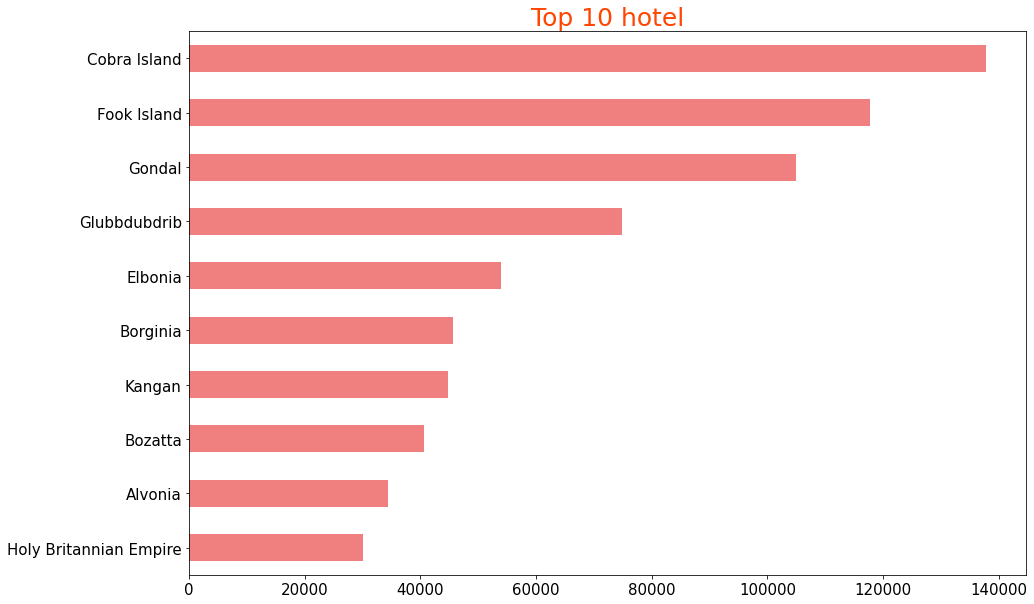

In [ ]:
fig,axes = plt.subplots(figsize = [15,10])
df['hotel_country'].value_counts().head(10).sort_values(ascending = True).plot(kind = 'barh', ax = axes, color = 'LightCoral')
plt.title('Top 10 hotel', fontsize= 25, color = 'OrangeRed')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [ ]:
#Phân tích các nước được chọn để booking:
timer.start()
df_booker_country = df.groupby('booker_country').count()
df_booker_country.sort_values(by= 'booker_country', inplace= True)
print('Time to exec mean_func %.5f sec:' % timer.stop())
df_booker_country


Time to exec mean_func 0.29215 sec:


,Unnamed: 0,user_id,checkin,checkout,city_id,device_class,affiliate_id,hotel_country,utrip_id,travel_time
booker_country,,,,,,,,,,
Bartovia,28638,28638,28638,28638,28638,28638,28638,28638,28638,28638
Elbonia,235344,235344,235344,235344,235344,235344,235344,235344,235344,235344
Gondal,536036,536036,536036,536036,536036,536036,536036,536036,536036,536036
Tcherkistan,80573,80573,80573,80573,80573,80573,80573,80573,80573,80573
The Devilfire Empire,286244,286244,286244,286244,286244,286244,286244,286244,286244,286244


Time to exec mean_func 0.05191 sec:


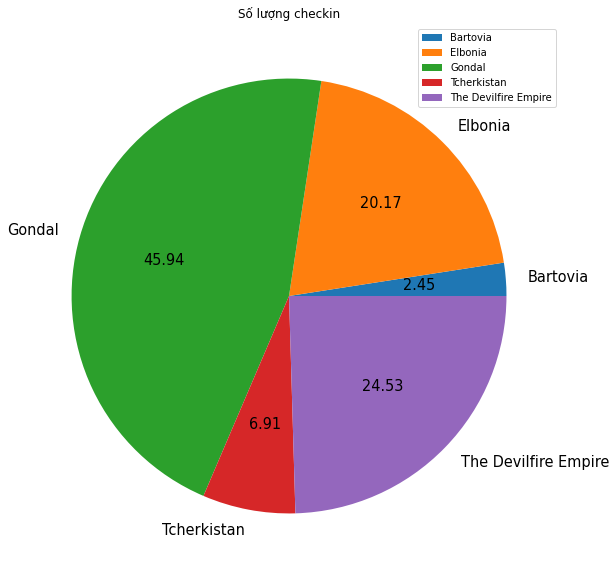

In [ ]:
#Biểu đồ thống kê số lượng du khách đến các nước:
timer.start()
ax = df_booker_country.plot.pie(y='user_id', legend= 3, figsize=(20,10),title = "Số lượng checkin", autopct='%.2f',fontsize = 14.5)
ax.set_ylabel('')
print('Time to exec mean_func %.5f sec:' % timer.stop())